## Importing the libraries

In [98]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import re

## Copying paragraph given in problem statement

In [99]:
paragraph = """ munchbox meals munchbox is a geelong-based boutique meal prep and delivery service,
specialising in artisan vegan and vegetarian meals and munchies. with a passion for
providing delicious and nutritious food that is ethical, sustainable and affordable, all
munchbox meals are made from scratch using a balance of the freshest local and organic
vegetables and fruit, grains, seeds and nuts and homegrown herbs. we chat to eden callick –
the brains behind the business – about all things munchbox. hey! thanks for chatting to forte!
first up, can you explain how munchbox became to be? munchbox was a daydream turned
reality. i was in a really draining job i hated, and would spend the majority of my lunch-break
looking for vegan food. the struggle to find a tasty, good quality, vegan meal is real.
sometimes it was so real i’d just give up looking, and go hungry. one day i hungrily and
jokingly announced, ‘i’m going to open my own vegan food business’ and with that impulsive
announcement, i quit my job almost immediately, and promised myself i would put my whole
heart and soul in to becoming the best vegan chef i can be. with a whole lot of determination,
passion and support from those around me, munchbox was born and is now my baby! i
guess a little bit of selfishness for me to have passion and purpose in life, as well as the lack
of real quality vegan cuisine on the geelong food scene is really how munchbox came to be
– out of necessity. where did your passion for vegan/vegetarian food come from? i’ve always
had a love and passion for food, but it wasn’t until i slowly transitioned to vegan that my
passion turned into a true obsession! it opened a whole new door for experimentation in the
kitchen; i want to create cruelty free food that tastes and looks better, but most importantly is
better for you! nothing makes me happier then feeding people and changing their views on
vegan food. can you give our readers a run-down of how ‘munchbox’ works? munchbox is
an artisan meal prep and delivery service, providing chef made meals to you. our munchers
can order online any time before friday midnight, with meals being ready for pick-up or
delivery on sunday. ready for the week ahead! these hours will soon be changing to include
24/7 online ordering, with pick-up and delivery between 7am-7pm seven days a week. all
meals come ready to eat or heat; those that are best enjoyed heated include a lit flame! we
also specialise in events and corporate catering; so, if there’s a bunch that’s got the munch,
we’re here to feed your sweet souls! where have you gathered most of your recipes and
ideas from? i’m constantly gathering ideas and inspiration from anywhere and everywhere! i
have a collection of paper scraps with scribbled recipes, and sleep with a notebook next to
my bed just in case i dream up a new idea. i have mood-boards, and future menu lists. it’s a
mess really! i find so much inspiration and ideas from traditional non-vegan meals, and have
been fortunate enough to work alongside some amazing non-vegan chefs who have (taught)
and inspired me incredibly. my mumma and sister, who are huge vegan foodies, are always
coming up with insane recipes for me as well. but each recipe is ultimately my own, made
from scratch, tried and tested until it’s perfected. how do you determine what local and
organic ingredients make the cut? we are passionately committed to sustainability and
supporting our local community. our menus are always based around the freshest seasonal
produce, sourced from local organic farmers, as well as other artisan vegan businesses who
supply some of our ingredients. we also lovingly grow all our own herbs, and as munchbox
expands so will our veggie garden; to include some pretty crazy exotic fruit and vege! what
type of people does this service suit? munchbox is perfect for those who are time poor, but
hungry, and care what they put in to their body. looking for a delicious and nutritious meal,
that isn’t frozen or full of crap. we put all the freshness, flavour, love and care into each meal,
so you don’t have to! breaky, lunch, or tea, pick up or delivery, we’ve got you covered so you
don’t have to think about cooking a thing! munchbox isn’t exclusively for vegetarians or
vegans, but is perfect for those looking to try a tasty healthy alternative! do you do custom
orders? or is everything off the set menu? yes! all our meals are fully customisable to suit
diet and taste! don’t like tomato? just let us know! gluten intolerant? we got you! you can add
or remove any ingredients and extras in our meals when you order. however, if you’d like our
chefs to create something extra special just for you, we’re more than happy to! we can
customise personalised menus, meal plans and munchboxes just for you! where are you
hoping to take munchbox in future? munchbox has big plans for the future! you can expect
an ever-changing menu (to keep up with my ever-changing mind). we’ll be incorporating
menulog and uber eats as apart of our service, and expanding trading hours and service
locations in the very near future. there may also be plans for ‘munch mobile’ to attend
festivals, markets, and events.. but i can’t give too much away! we have sooo many
surprises for ya’ll, but i can’t spoil them all at once! check it out via insta @vegan.munchbox
or you can get your munch on at munchboxmeals.com.au """

## Copying list given in problem statement and writing it in form of dictionary

In [100]:
dic = {'Ambrette Seed': "none",
'Apple Cinnamon Granola': "none",
'Arizona Seasoning': "none",
'Americano Coffee': "none",
'Baby Abalone': "none",
'Cadbury Double Decker Chocolate Bar': "none",
'Campari Tomato': "none",
'Celery Soup': "none",
'Chia Meal': "none",
'Crunch Bars': "none",
'Cardamom': "none",
'Giardiniera': "none",
'Hog Maw': "none",
'Mccormick Montreal Steak Seasoning': "none",
'Muesli': "none",
'Mulberry': "none",
'Munch Chocolate': "none",
'Murukku Packet': "none",
'Mango': "none",
'Organic Maize': "none",
'Organic Peruvian Groundcherry': "none",
'Organic Tartar Cream': "none",
'Orange Extract': "none",
'Pickled Cauliflower': "none",
'Pork Chump Chops': "none",
'Pork Lungs': "none",
'Pork Tripe': "none",
'Peanut Butter': "none",
'Smokies Sausage': "none",
'Snickers Spread': "none",
'Strawberry Gelatin': "none",
'Salmon': "none",
'Tomato': "none",
'Tamarind': "none",
'Vegan Carob Chips': "none",
'Vegan Chicken Strips': "none",
'Vegan Chorizo': "none",
'Vegan Marshmallow': "none",
'Vegan Puff Pastry Sheet': "none",
'Vegan Semisweet Chocolate Chips': "none",
'Vegan White Cake': "none",
'Vegetable Stock': "none",
'Vinegar': "none"}

## Text cleaning

In [101]:
import string

text = re.sub(r'\[[0-9]]*\)',' ', paragraph)
translator = str.maketrans('', '', string.punctuation)
text = text.translate(translator)
text = re.sub(r'\s+',' ', text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+', ' ', text)

##  Tokenizing paragraph into sentences

In [102]:
sentences = nltk.sent_tokenize(text)
sentences

[' munchbox meals munchbox is a geelongbased boutique meal prep and delivery service specialising in artisan vegan and vegetarian meals and munchies with a passion for providing delicious and nutritious food that is ethical sustainable and affordable all munchbox meals are made from scratch using a balance of the freshest local and organic vegetables and fruit grains seeds and nuts and homegrown herbs we chat to eden callick – the brains behind the business – about all things munchbox hey thanks for chatting to forte first up can you explain how munchbox became to be munchbox was a daydream turned reality i was in a really draining job i hated and would spend the majority of my lunchbreak looking for vegan food the struggle to find a tasty good quality vegan meal is real sometimes it was so real i’d just give up looking and go hungry one day i hungrily and jokingly announced ‘i’m going to open my own vegan food business’ and with that impulsive announcement i quit my job almost immedia

## Tokenizing words from tokenize sentence

In [103]:
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
sentences

[['munchbox',
  'meals',
  'munchbox',
  'is',
  'a',
  'geelongbased',
  'boutique',
  'meal',
  'prep',
  'and',
  'delivery',
  'service',
  'specialising',
  'in',
  'artisan',
  'vegan',
  'and',
  'vegetarian',
  'meals',
  'and',
  'munchies',
  'with',
  'a',
  'passion',
  'for',
  'providing',
  'delicious',
  'and',
  'nutritious',
  'food',
  'that',
  'is',
  'ethical',
  'sustainable',
  'and',
  'affordable',
  'all',
  'munchbox',
  'meals',
  'are',
  'made',
  'from',
  'scratch',
  'using',
  'a',
  'balance',
  'of',
  'the',
  'freshest',
  'local',
  'and',
  'organic',
  'vegetables',
  'and',
  'fruit',
  'grains',
  'seeds',
  'and',
  'nuts',
  'and',
  'homegrown',
  'herbs',
  'we',
  'chat',
  'to',
  'eden',
  'callick',
  '–',
  'the',
  'brains',
  'behind',
  'the',
  'business',
  '–',
  'about',
  'all',
  'things',
  'munchbox',
  'hey',
  'thanks',
  'for',
  'chatting',
  'to',
  'forte',
  'first',
  'up',
  'can',
  'you',
  'explain',
  'how',
 

## Lemmatizing each tokenize words by removing stopwords

In [104]:
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
for i in range(len(sentences)):
    sentences[i] = [wordnet.lemmatize(word) for word in sentences[i] if word not in stopwords.words('english')]
len(sentences)

1

In [105]:
sentences

[['munchbox',
  'meal',
  'munchbox',
  'geelongbased',
  'boutique',
  'meal',
  'prep',
  'delivery',
  'service',
  'specialising',
  'artisan',
  'vegan',
  'vegetarian',
  'meal',
  'munchies',
  'passion',
  'providing',
  'delicious',
  'nutritious',
  'food',
  'ethical',
  'sustainable',
  'affordable',
  'munchbox',
  'meal',
  'made',
  'scratch',
  'using',
  'balance',
  'freshest',
  'local',
  'organic',
  'vegetable',
  'fruit',
  'grain',
  'seed',
  'nut',
  'homegrown',
  'herb',
  'chat',
  'eden',
  'callick',
  '–',
  'brain',
  'behind',
  'business',
  '–',
  'thing',
  'munchbox',
  'hey',
  'thanks',
  'chatting',
  'forte',
  'first',
  'explain',
  'munchbox',
  'became',
  'munchbox',
  'daydream',
  'turned',
  'reality',
  'really',
  'draining',
  'job',
  'hated',
  'would',
  'spend',
  'majority',
  'lunchbreak',
  'looking',
  'vegan',
  'food',
  'struggle',
  'find',
  'tasty',
  'good',
  'quality',
  'vegan',
  'meal',
  'real',
  'sometimes',
  

## Converting list into tuple for hashing purpose

In [106]:
sentence = ()
for i in sentences:
    sentence = tuple(i)
sentence


('munchbox',
 'meal',
 'munchbox',
 'geelongbased',
 'boutique',
 'meal',
 'prep',
 'delivery',
 'service',
 'specialising',
 'artisan',
 'vegan',
 'vegetarian',
 'meal',
 'munchies',
 'passion',
 'providing',
 'delicious',
 'nutritious',
 'food',
 'ethical',
 'sustainable',
 'affordable',
 'munchbox',
 'meal',
 'made',
 'scratch',
 'using',
 'balance',
 'freshest',
 'local',
 'organic',
 'vegetable',
 'fruit',
 'grain',
 'seed',
 'nut',
 'homegrown',
 'herb',
 'chat',
 'eden',
 'callick',
 '–',
 'brain',
 'behind',
 'business',
 '–',
 'thing',
 'munchbox',
 'hey',
 'thanks',
 'chatting',
 'forte',
 'first',
 'explain',
 'munchbox',
 'became',
 'munchbox',
 'daydream',
 'turned',
 'reality',
 'really',
 'draining',
 'job',
 'hated',
 'would',
 'spend',
 'majority',
 'lunchbreak',
 'looking',
 'vegan',
 'food',
 'struggle',
 'find',
 'tasty',
 'good',
 'quality',
 'vegan',
 'meal',
 'real',
 'sometimes',
 'real',
 '’',
 'give',
 'looking',
 'go',
 'hungry',
 'one',
 'day',
 'hungrily',


##  Creating Frequencies of token words

In [107]:
n = len(sentences[0])
frequency = {}
for item in sentence:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1
frequency



{'munchbox': 15,
 'meal': 15,
 'geelongbased': 1,
 'boutique': 1,
 'prep': 2,
 'delivery': 5,
 'service': 5,
 'specialising': 1,
 'artisan': 3,
 'vegan': 11,
 'vegetarian': 2,
 'munchies': 1,
 'passion': 6,
 'providing': 2,
 'delicious': 2,
 'nutritious': 2,
 'food': 8,
 'ethical': 1,
 'sustainable': 1,
 'affordable': 1,
 'made': 3,
 'scratch': 2,
 'using': 1,
 'balance': 1,
 'freshest': 2,
 'local': 4,
 'organic': 3,
 'vegetable': 1,
 'fruit': 2,
 'grain': 1,
 'seed': 1,
 'nut': 1,
 'homegrown': 1,
 'herb': 2,
 'chat': 1,
 'eden': 1,
 'callick': 1,
 '–': 3,
 'brain': 1,
 'behind': 1,
 'business': 3,
 'thing': 2,
 'hey': 1,
 'thanks': 1,
 'chatting': 1,
 'forte': 1,
 'first': 1,
 'explain': 1,
 'became': 1,
 'daydream': 1,
 'turned': 2,
 'reality': 1,
 'really': 3,
 'draining': 1,
 'job': 2,
 'hated': 1,
 'would': 2,
 'spend': 1,
 'majority': 1,
 'lunchbreak': 1,
 'looking': 4,
 'struggle': 1,
 'find': 2,
 'tasty': 2,
 'good': 1,
 'quality': 2,
 'real': 3,
 'sometimes': 1,
 '’': 25,
 '

## Fitting model using Word2Vec

In [108]:
model = Word2Vec(sentences, min_count = 1)

In [109]:
similar = model.wv.most_similar('vegan')

In [110]:
similar

[('cooking', 0.29796960949897766),
 ('using', 0.27322086691856384),
 ('thanks', 0.2575354278087616),
 ('near', 0.23636555671691895),
 ('location', 0.22661441564559937),
 ('support', 0.22384315729141235),
 ('exclusively', 0.21737347543239594),
 ('paper', 0.2125781923532486),
 ('like', 0.20560188591480255),
 ('menulog', 0.18729005753993988)]

## Finding Ranking order using Summation of Similarity value * (frequency of Token Words) / (frequency of Total Words)

In [111]:
dic1={}
for key in dic:
    sum = 0
    lis = key.split()
    for item in lis:
        try:
            similar = model.wv.most_similar(wordnet.lemmatize(item.lower()))
            sum += similar[0][1]*frequency[wordnet.lemmatize(item.lower())]
        except:
#             print("error ")
            sum += 0
    
        dic1[key] = float(sum/n)
        
if key in dic.keys():
        print("Present, ", end =" ")
        print("value =", dic[key])

Present,  value = none


## Finding word from list having maximum ranking order

In [112]:
final_res = []
maxi = float('-inf')
for key, value in dic1.items():
    if value>maxi:
        final_res = [key]
        maxi = value
    elif value == maxi:
        final_res.append(key)

## Maximum ranking order item

In [113]:
final_res

['Chia Meal']

## Dictionary of items with ranking

In [114]:
dic1

{'Ambrette Seed': 0.0004924182066193814,
 'Apple Cinnamon Granola': 0.0,
 'Arizona Seasoning': 0.0,
 'Americano Coffee': 0.0,
 'Baby Abalone': 0.0004912759195505877,
 'Cadbury Double Decker Chocolate Bar': 0.0,
 'Campari Tomato': 0.0005411094612648515,
 'Celery Soup': 0.0,
 'Chia Meal': 0.010995975032390788,
 'Crunch Bars': 0.0,
 'Cardamom': 0.0,
 'Giardiniera': 0.0,
 'Hog Maw': 0.0,
 'Mccormick Montreal Steak Seasoning': 0.0,
 'Muesli': 0.0,
 'Mulberry': 0.0,
 'Munch Chocolate': 0.0014581278778235736,
 'Murukku Packet': 0.0,
 'Mango': 0.0,
 'Organic Maize': 0.0016796848653355461,
 'Organic Peruvian Groundcherry': 0.0016796848653355461,
 'Organic Tartar Cream': 0.0016796848653355461,
 'Orange Extract': 0.0,
 'Pickled Cauliflower': 0.0,
 'Pork Chump Chops': 0.0,
 'Pork Lungs': 0.0,
 'Pork Tripe': 0.0,
 'Peanut Butter': 0.0,
 'Smokies Sausage': 0.0,
 'Snickers Spread': 0.0,
 'Strawberry Gelatin': 0.0,
 'Salmon': 0.0,
 'Tomato': 0.0005411094612648515,
 'Tamarind': 0.0,
 'Vegan Carob Chips

# FINAL ANSWER IN FORM OF DICTIONARY

In [115]:
dic1 = {k:v for k, v in sorted(dic1.items(), key= lambda item:item[1],reverse=True)}
dic1

{'Chia Meal': 0.010995975032390788,
 'Vegan Carob Chips': 0.006376781526242712,
 'Vegan Chicken Strips': 0.006376781526242712,
 'Vegan Chorizo': 0.006376781526242712,
 'Vegan Marshmallow': 0.006376781526242712,
 'Vegan Puff Pastry Sheet': 0.006376781526242712,
 'Vegan Semisweet Chocolate Chips': 0.006376781526242712,
 'Vegan White Cake': 0.006376781526242712,
 'Organic Maize': 0.0016796848653355461,
 'Organic Peruvian Groundcherry': 0.0016796848653355461,
 'Organic Tartar Cream': 0.0016796848653355461,
 'Munch Chocolate': 0.0014581278778235736,
 'Campari Tomato': 0.0005411094612648515,
 'Tomato': 0.0005411094612648515,
 'Vegetable Stock': 0.0005106550246361164,
 'Ambrette Seed': 0.0004924182066193814,
 'Baby Abalone': 0.0004912759195505877,
 'Apple Cinnamon Granola': 0.0,
 'Arizona Seasoning': 0.0,
 'Americano Coffee': 0.0,
 'Cadbury Double Decker Chocolate Bar': 0.0,
 'Celery Soup': 0.0,
 'Crunch Bars': 0.0,
 'Cardamom': 0.0,
 'Giardiniera': 0.0,
 'Hog Maw': 0.0,
 'Mccormick Montreal 

In [116]:
keys = []
val = []
for key, value in dic1.items():
    keys.append(key)
    val.append(float(value))

In [117]:
keys


['Chia Meal',
 'Vegan Carob Chips',
 'Vegan Chicken Strips',
 'Vegan Chorizo',
 'Vegan Marshmallow',
 'Vegan Puff Pastry Sheet',
 'Vegan Semisweet Chocolate Chips',
 'Vegan White Cake',
 'Organic Maize',
 'Organic Peruvian Groundcherry',
 'Organic Tartar Cream',
 'Munch Chocolate',
 'Campari Tomato',
 'Tomato',
 'Vegetable Stock',
 'Ambrette Seed',
 'Baby Abalone',
 'Apple Cinnamon Granola',
 'Arizona Seasoning',
 'Americano Coffee',
 'Cadbury Double Decker Chocolate Bar',
 'Celery Soup',
 'Crunch Bars',
 'Cardamom',
 'Giardiniera',
 'Hog Maw',
 'Mccormick Montreal Steak Seasoning',
 'Muesli',
 'Mulberry',
 'Murukku Packet',
 'Mango',
 'Orange Extract',
 'Pickled Cauliflower',
 'Pork Chump Chops',
 'Pork Lungs',
 'Pork Tripe',
 'Peanut Butter',
 'Smokies Sausage',
 'Snickers Spread',
 'Strawberry Gelatin',
 'Salmon',
 'Tamarind',
 'Vinegar']

In [118]:
val

[0.010995975032390788,
 0.006376781526242712,
 0.006376781526242712,
 0.006376781526242712,
 0.006376781526242712,
 0.006376781526242712,
 0.006376781526242712,
 0.006376781526242712,
 0.0016796848653355461,
 0.0016796848653355461,
 0.0016796848653355461,
 0.0014581278778235736,
 0.0005411094612648515,
 0.0005411094612648515,
 0.0005106550246361164,
 0.0004924182066193814,
 0.0004912759195505877,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

## Plotting bar in decscending order of Ranking list

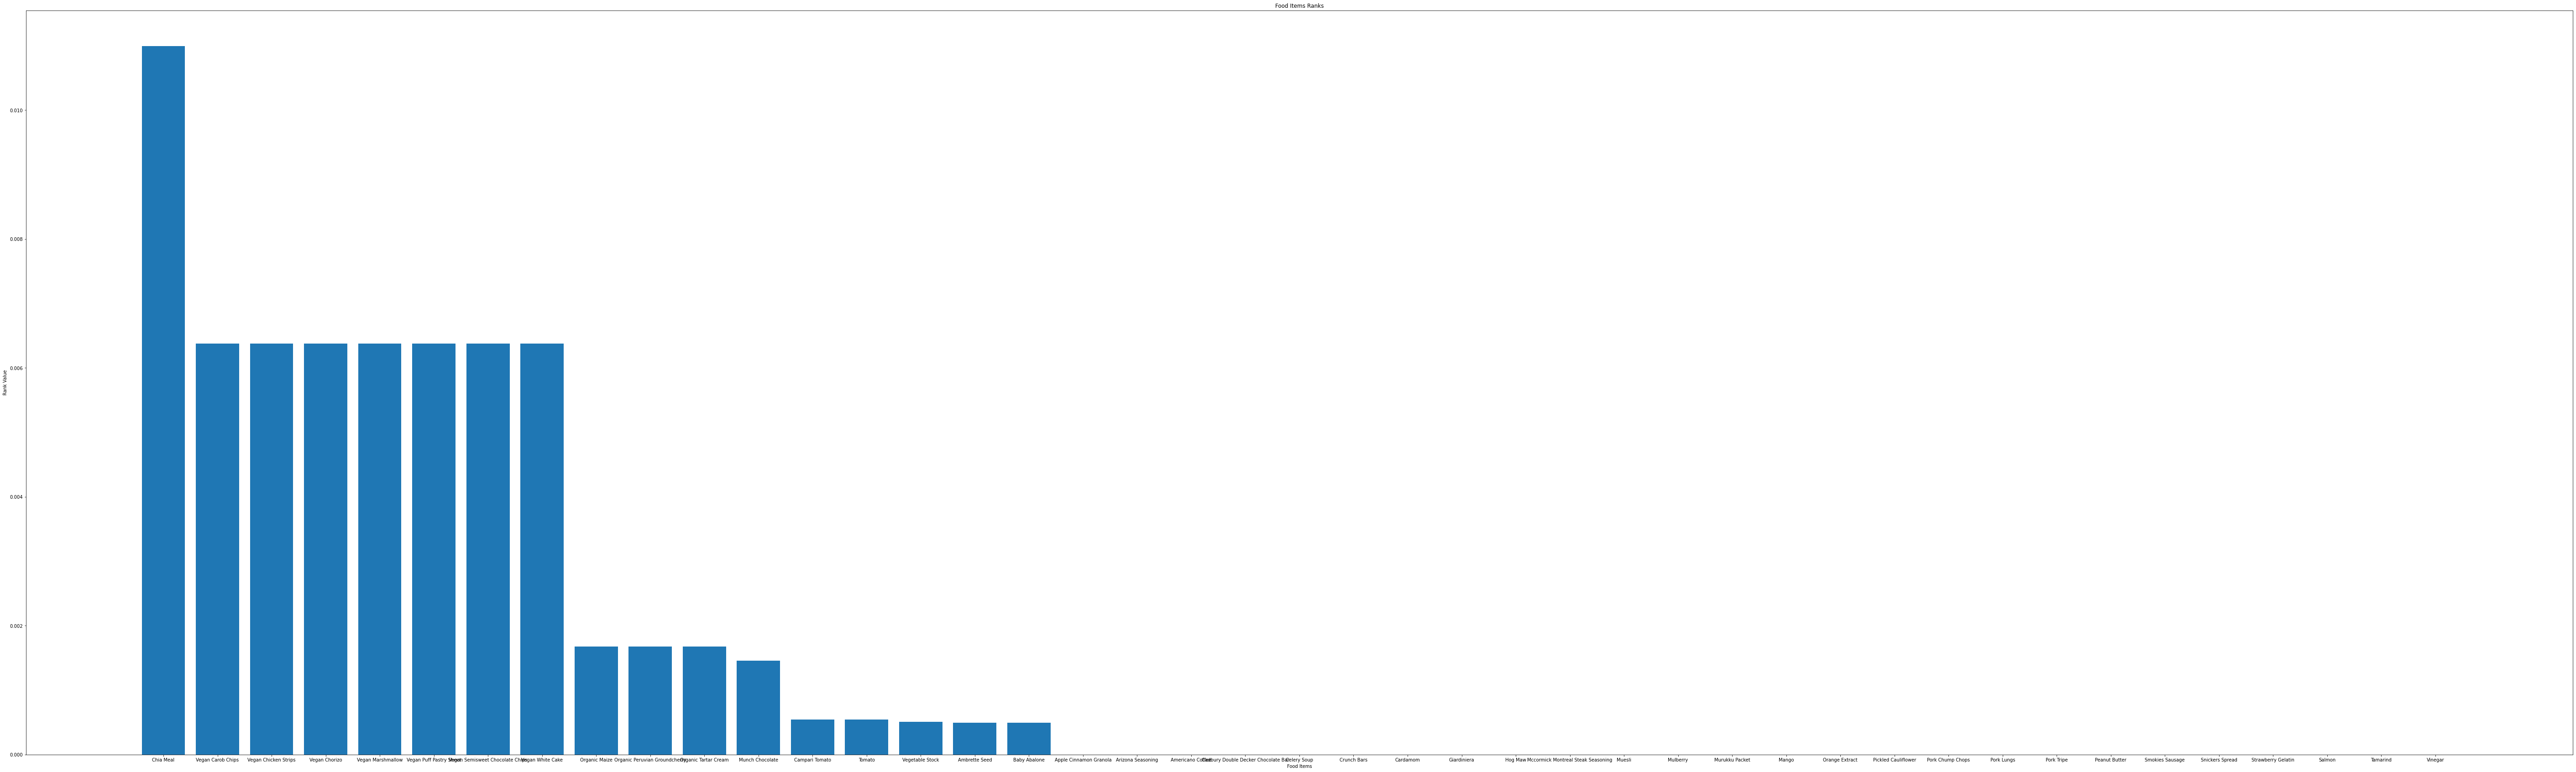

In [119]:
from matplotlib import pyplot as plt
plt.figure(figsize=(100, 30))
plt.bar(keys, val)
plt.title("Food Items Ranks")
plt.ylabel("Rank Value")
plt.xlabel("Food Items")
plt.show()